In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
data = pd.read_csv('data_scraping/data/all_data_cleaned.csv')
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatic,4x4 (permanent),8.0,SUV,5.0,7.0,Gray,Poland,True,True,Used,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Gasoline,125.0,Manual,Front-wheel,NaN,Compact,5.0,5.0,Black,NaN,True,True,Used,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatic,4x4 (permanent),5.0,Estate,5.0,5.0,Gray,NaN,False,False,Used,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Gasoline,252.0,Automatic,4x4 (permanent),8.0,SUV,5.0,5.0,Gray,NaN,False,False,Used,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Gasoline,333.0,Automatic,4x4 (permanent),10.0,Compact,5.0,5.0,White,NaN,False,False,Used,75000.0


## **Quantitative analysis**

### **Brand**

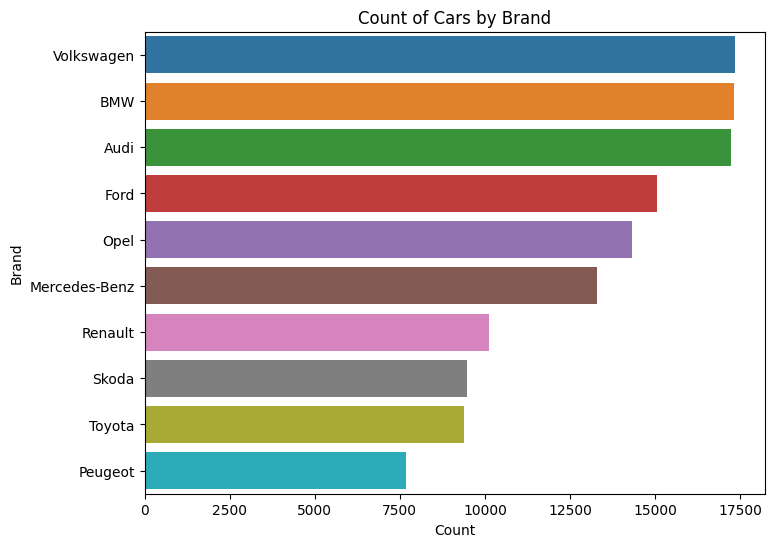

In [270]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='brand', order=data['brand'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Count of Cars by Brand')
plt.show()

It is worth noting that the dataset exhibits notable variations in brand counts. This discrepancy arises due to the nature of the data source, specifically the website from which the data was scraped.

### **Model**

An effective approach to visualize the count of each model within a brand is by using a Tree Map. However, considering the readability factor in the end I decided to go with a simple, easily readable bar plot.

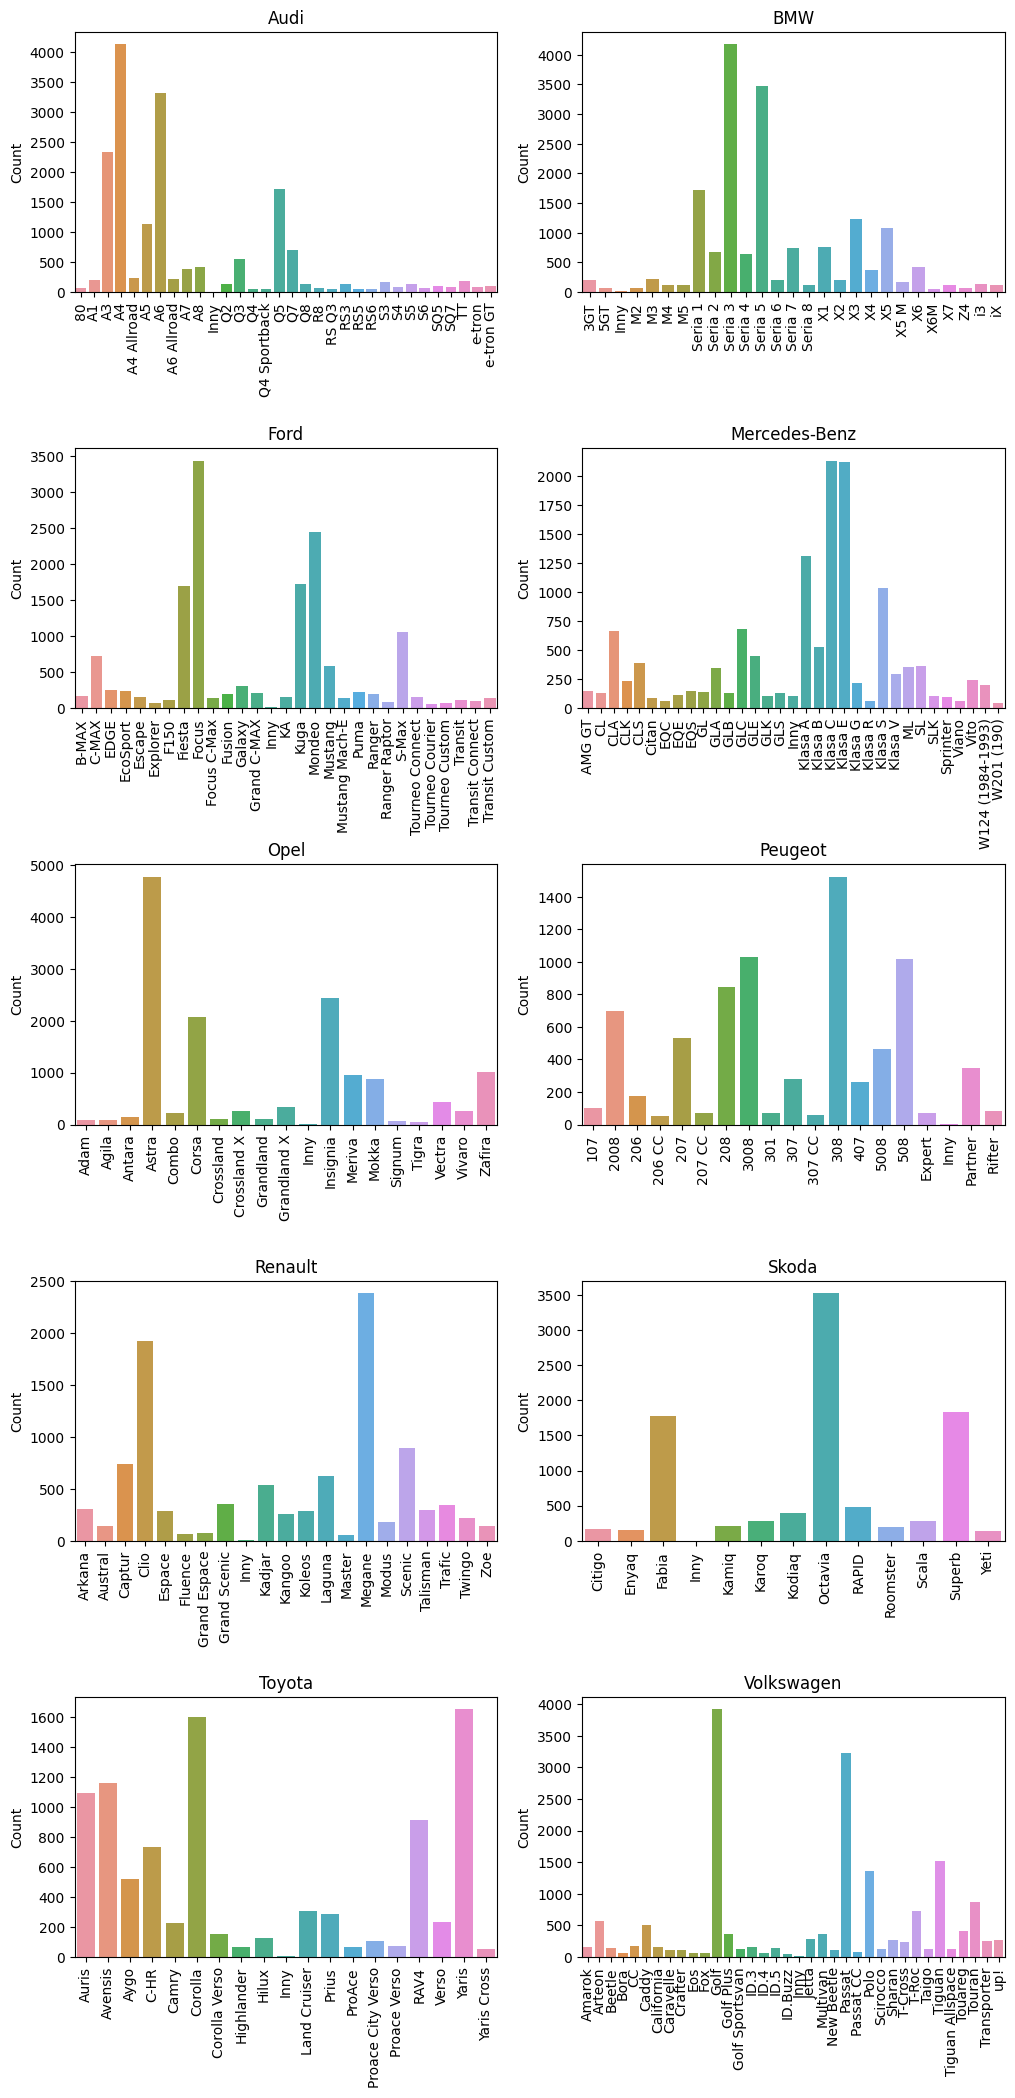

In [271]:
grouped_brand = data.groupby(['brand', 'model']).size().reset_index(name='count')

brands = grouped_brand['brand'].unique()

fig, axes = plt.subplots(5, 2, figsize=(12, 25))

for i, brand in enumerate(brands):
    brand_data = grouped_brand[grouped_brand['brand'] == brand]
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    fig.subplots_adjust(hspace=0.6)

    sns.barplot(data=brand_data, x='model', y='count', ax=ax)
    ax.set_title(brand)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [272]:
#  What are the top n car models for each brand based on their count percentage?

# Total count for each brand
brand_counts = grouped_brand.groupby('brand')['count'].transform('sum')

grouped_brand['percentage'] = grouped_brand['count'] / brand_counts * 100

sorted_brand = grouped_brand.sort_values(['brand', 'percentage'], ascending=[True, False])

n = 1 # Number of top models to show for each brand

top_n_brand = sorted_brand.groupby('brand').head(1)

top_n_brand.reset_index(drop=True)

,brand,model,count,percentage
0,Audi,A4,4134,23.973556
1,BMW,Seria 3,4175,24.114827
2,Ford,Focus,3439,22.821687
3,Mercedes-Benz,Klasa C,2135,16.053839
4,Opel,Astra,4769,33.312378
5,Peugeot,308,1522,19.812549
6,Renault,Megane,2385,23.590504
7,Skoda,Octavia,3525,37.262156
8,Toyota,Yaris,1651,17.606911
9,Volkswagen,Golf,3918,22.584736


Within each brand, there are a few car models that stand out as the most popular. Notably, Opel and Skoda exhibit particularly extreme cases, with one of their models accounting for over 30% of all observations within their respective brands.

In [273]:
# How many models within each brand account for approximately n% of the observations?

sorted_brand['cumulative_percentage'] = sorted_brand.groupby('brand')['percentage'].cumsum()

n = 90 # Percentage of observations to account for within each brand

models_n_percent = sorted_brand[sorted_brand['cumulative_percentage'] <= n].groupby('brand')['model'].nunique()

print(f'On average, {int(round(models_n_percent.mean(), 0))} models account for {n}% of the observations for each brand.')

models_n_percent

On average, 12 models account for 90% of the observations for each brand.


brand
Audi             12
BMW              12
Ford             15
Mercedes-Benz    19
Opel              7
Peugeot           9
Renault          12
Skoda             6
Toyota            9
Volkswagen       18
Name: model, dtype: int64

Mercedes-Benz and Volkswagen demonstrate a wider selection of models (19 and 18, respectively) that collectively contribute to 90% of the observations. This implies a more diverse popularity distribution across a broader range of models within these brands.
  
In contrast, Opel and Skoda exhibit the lowest number of models (7 and 6, respectively) accounting for 90% of the observations. This outcome is unsurprising given that these brands have one particular model that alone represents over 30% of the observations within their respective brands.

### **Other categorical features**

In [274]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatic,4x4 (permanent),8.0,SUV,5.0,7.0,Gray,Poland,True,True,Used,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Gasoline,125.0,Manual,Front-wheel,NaN,Compact,5.0,5.0,Black,NaN,True,True,Used,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatic,4x4 (permanent),5.0,Estate,5.0,5.0,Gray,NaN,False,False,Used,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Gasoline,252.0,Automatic,4x4 (permanent),8.0,SUV,5.0,5.0,Gray,NaN,False,False,Used,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Gasoline,333.0,Automatic,4x4 (permanent),10.0,Compact,5.0,5.0,White,NaN,False,False,Used,75000.0


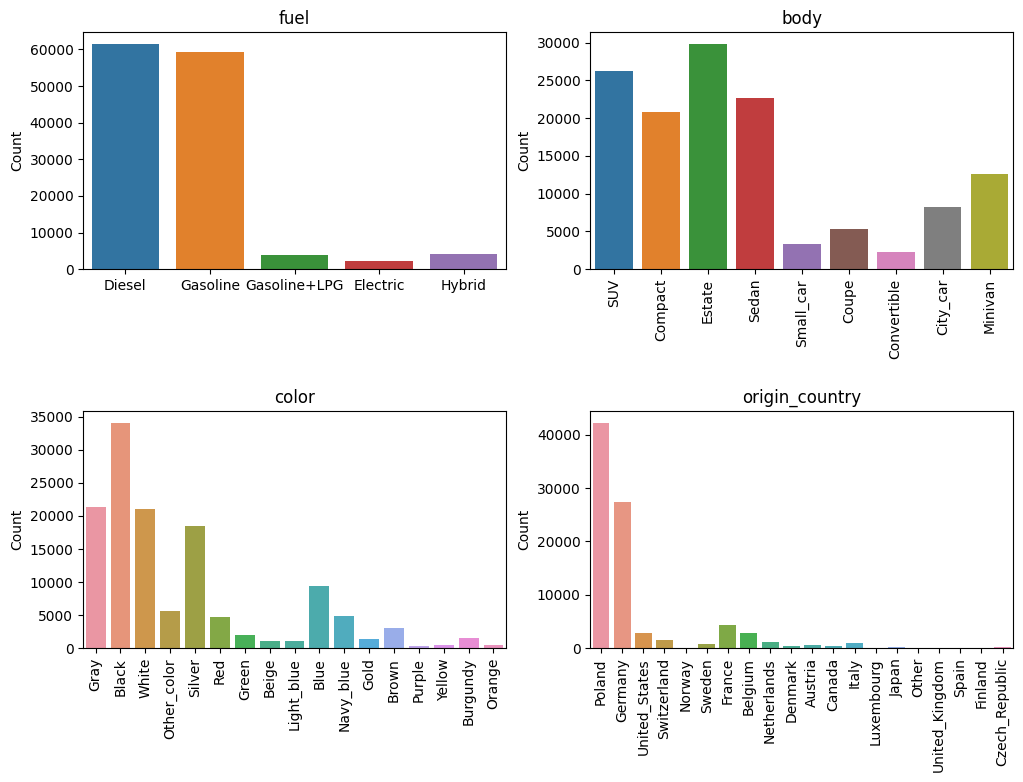

In [275]:
cats = ['fuel', 'body', 'color', 'origin_country']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, cat in enumerate(cats):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    fig.subplots_adjust(hspace=0.6)

    sns.countplot(x=data[cat], ax=ax)
    ax.set_title(cat)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    if i not in [0]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

* There are two main **fuel** types in the dataset: Diesel and Gasoline,
* **Body** types of cars are pretty diverse,
* As expected, the most popular car **colors** remain the classic choices: Black, Gray, White, and Silver,
* Since otomoto.pl is a Polish website, **origin country** of the majority of cars is Poland. However, what is interesting, nearly 32% of the cars (with available data) trace their origins back to Germany.

In [313]:
for i in ['drive', 'doors', 'seats']:
    print((data[i].value_counts()/data[i].value_counts().sum())*100)
    print('\n')

drive
Front-wheel        65.094141
4x4 (permanent)    11.852670
Rear-wheel         11.538866
4x4 (automatic)    10.767505
4x4 (manual)        0.746818
Name: count, dtype: float64


doors
5.0    78.185273
4.0    13.428455
3.0     4.645246
2.0     3.698879
6.0     0.042146
Name: count, dtype: float64


seats
5.0    87.367933
4.0     5.899516
7.0     3.992881
2.0     0.937063
9.0     0.661552
6.0     0.412860
8.0     0.378726
3.0     0.349468
Name: count, dtype: float64




Majority of the cars have typical front-wheel drive, 5 doors and 5 seats.

### **Numerical features**

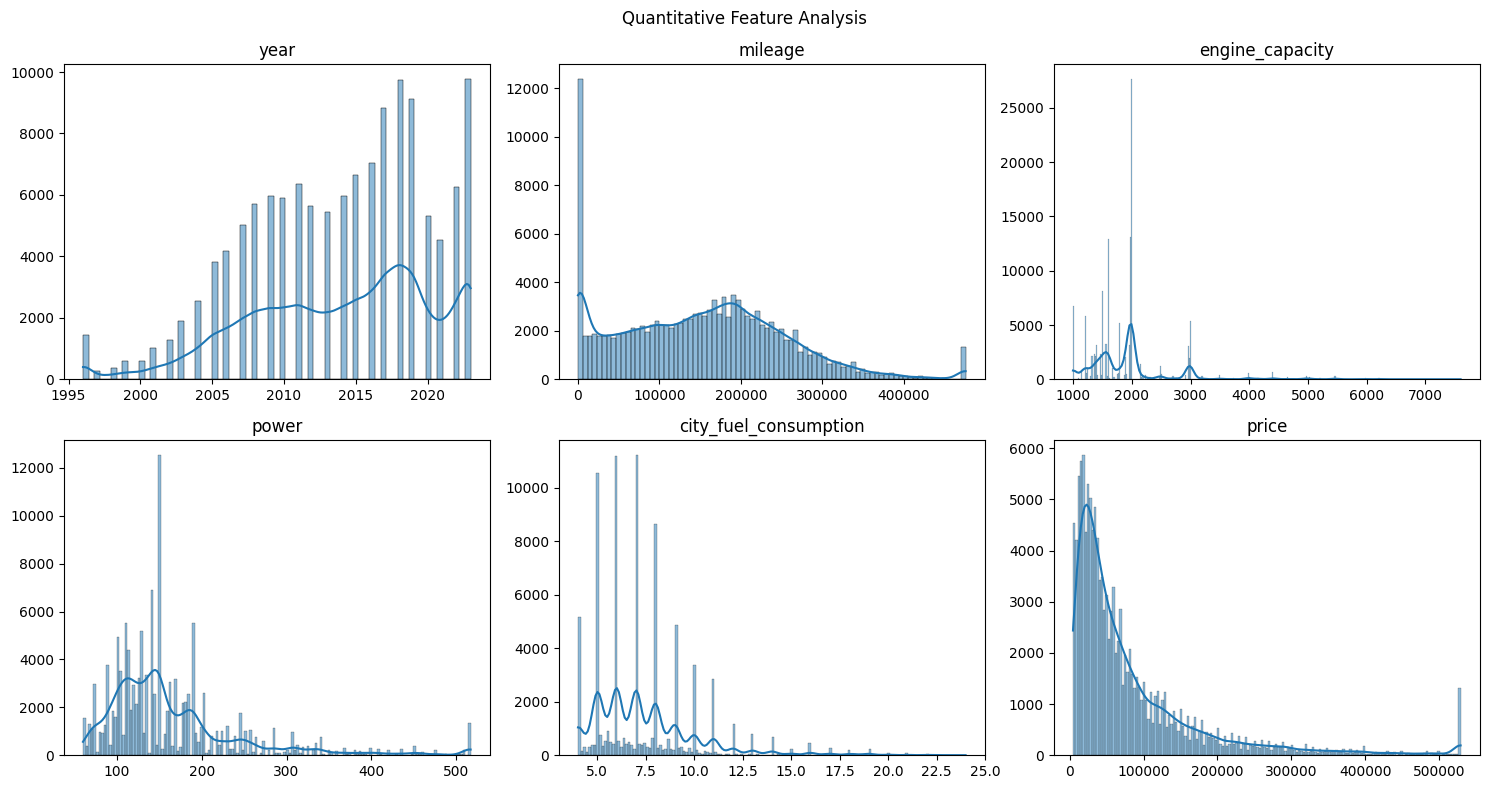

In [277]:
# Quantitative Analysis Plots
quantitative_features = ['year', 'mileage', 'engine_capacity', 'power', 'city_fuel_consumption',  'price']

# Create subplots for quantitative features
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle('Quantitative Feature Analysis')

for i, feature in enumerate(quantitative_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=data, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

It is important to highlight that the peaks observed at the beginning and end of the histograms stem from the winsorization applied during the data cleaning process.

## **Price analysis**

In [278]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatic,4x4 (permanent),8.0,SUV,5.0,7.0,Gray,Poland,True,True,Used,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Gasoline,125.0,Manual,Front-wheel,NaN,Compact,5.0,5.0,Black,NaN,True,True,Used,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatic,4x4 (permanent),5.0,Estate,5.0,5.0,Gray,NaN,False,False,Used,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Gasoline,252.0,Automatic,4x4 (permanent),8.0,SUV,5.0,5.0,Gray,NaN,False,False,Used,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Gasoline,333.0,Automatic,4x4 (permanent),10.0,Compact,5.0,5.0,White,NaN,False,False,Used,75000.0


### **Brand**

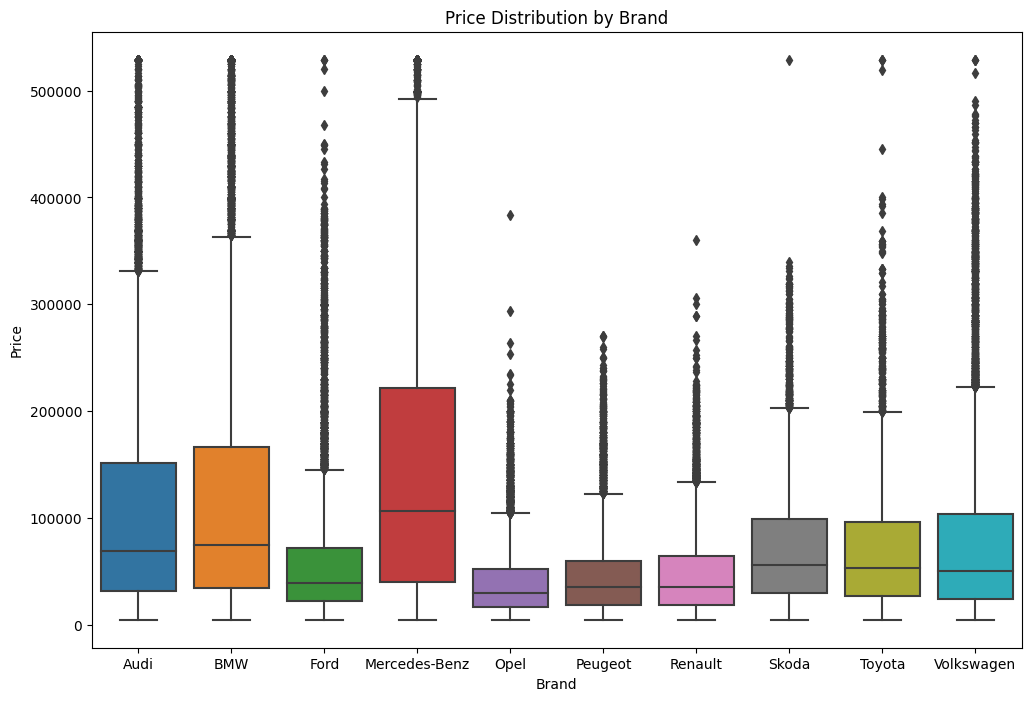

In [279]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='brand', y='price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')
plt.show()

### **Model**

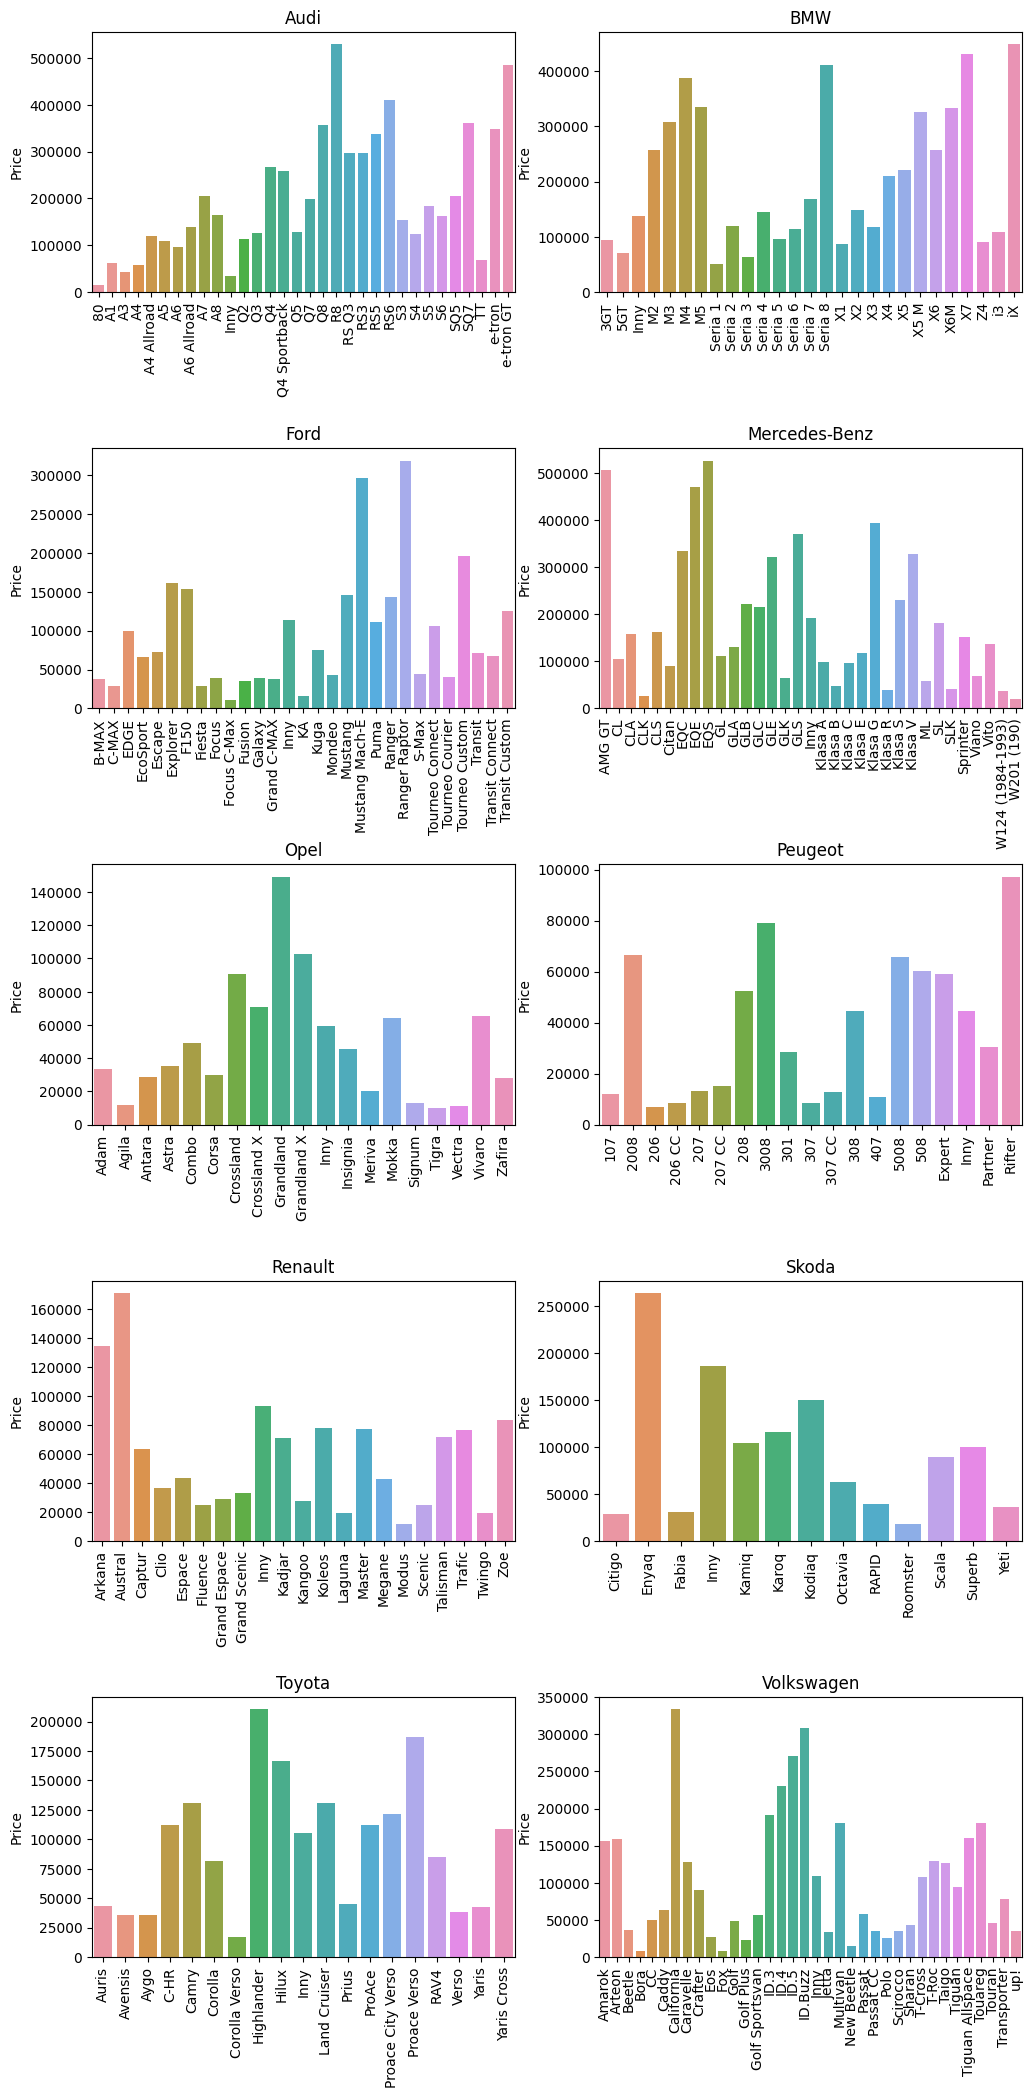

In [280]:
grouped_brand = data.groupby(['brand', 'model'])['price'].mean().reset_index(name='price')

brands = grouped_brand['brand'].unique()

fig, axes = plt.subplots(5, 2, figsize=(12, 25))

for i, brand in enumerate(brands):
    brand_data = grouped_brand[grouped_brand['brand'] == brand]
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    fig.subplots_adjust(hspace=0.6)

    sns.barplot(data=brand_data, x='model', y='price', ax=ax)
    ax.set_title(brand)
    ax.set_xlabel('')
    ax.set_ylabel('Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [281]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatic,4x4 (permanent),8.0,SUV,5.0,7.0,Gray,Poland,True,True,Used,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Gasoline,125.0,Manual,Front-wheel,NaN,Compact,5.0,5.0,Black,NaN,True,True,Used,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatic,4x4 (permanent),5.0,Estate,5.0,5.0,Gray,NaN,False,False,Used,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Gasoline,252.0,Automatic,4x4 (permanent),8.0,SUV,5.0,5.0,Gray,NaN,False,False,Used,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Gasoline,333.0,Automatic,4x4 (permanent),10.0,Compact,5.0,5.0,White,NaN,False,False,Used,75000.0


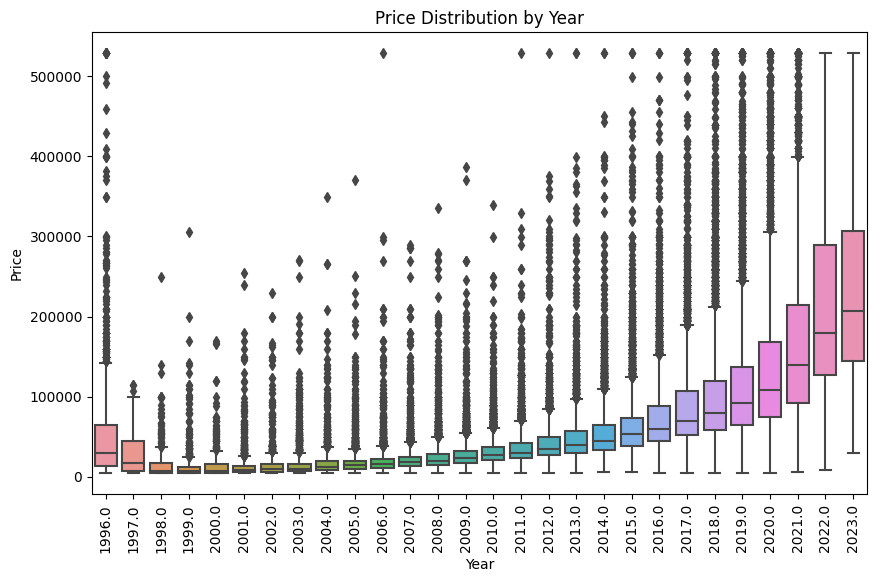

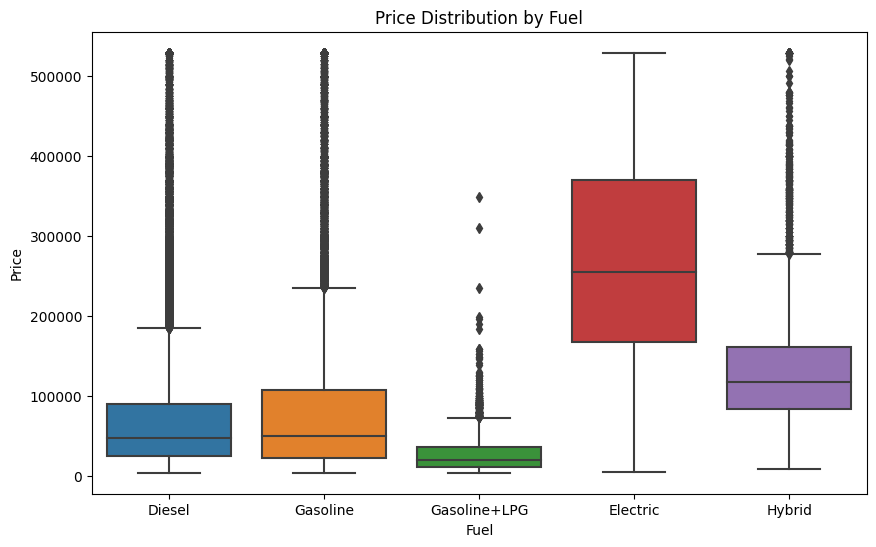

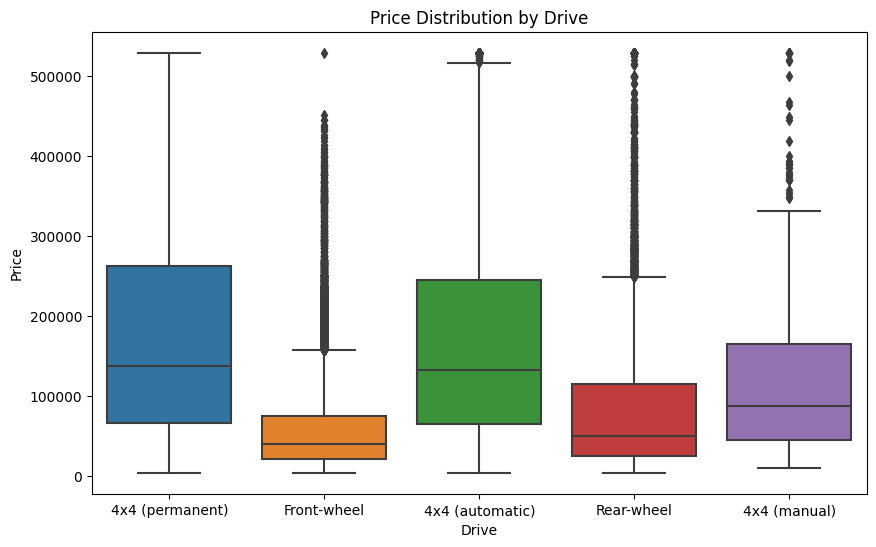

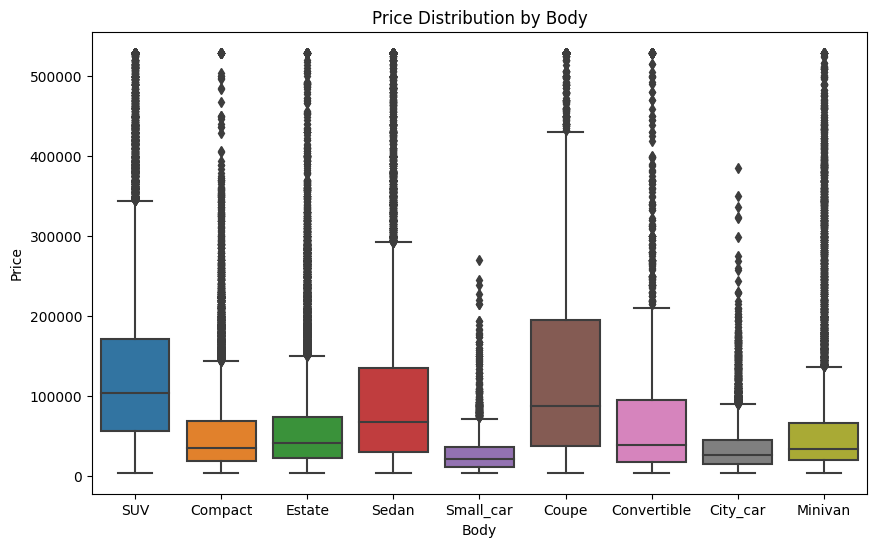

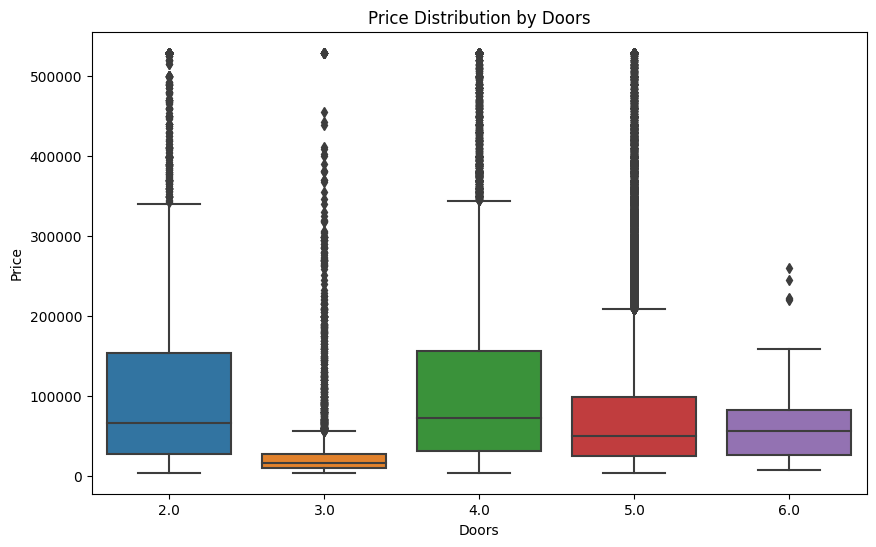

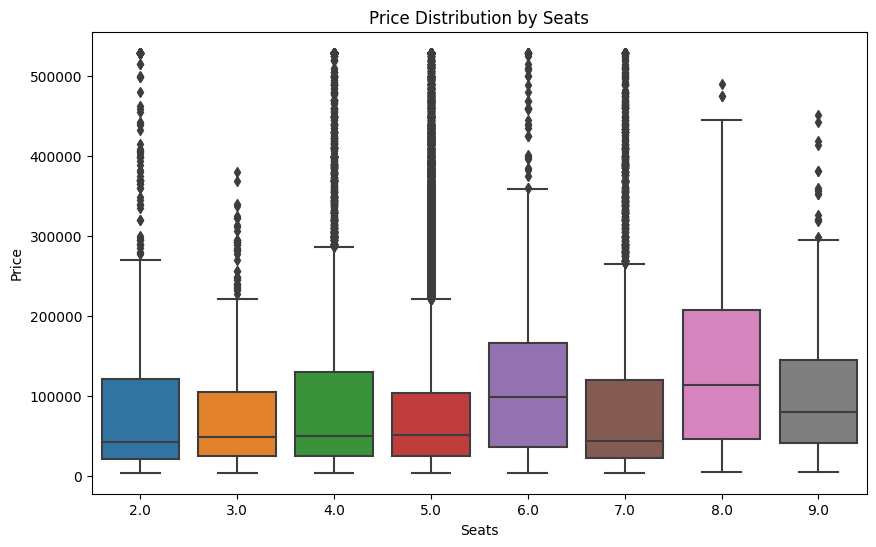

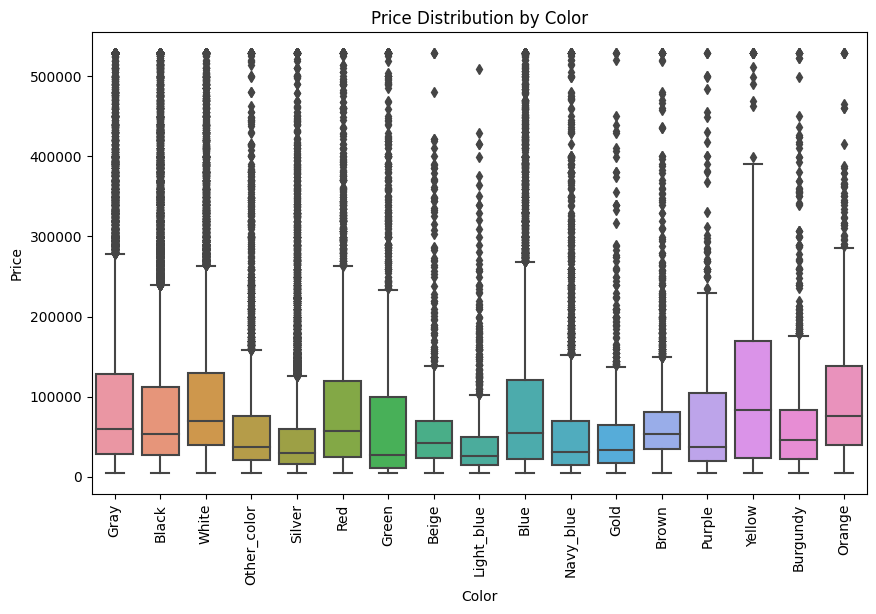

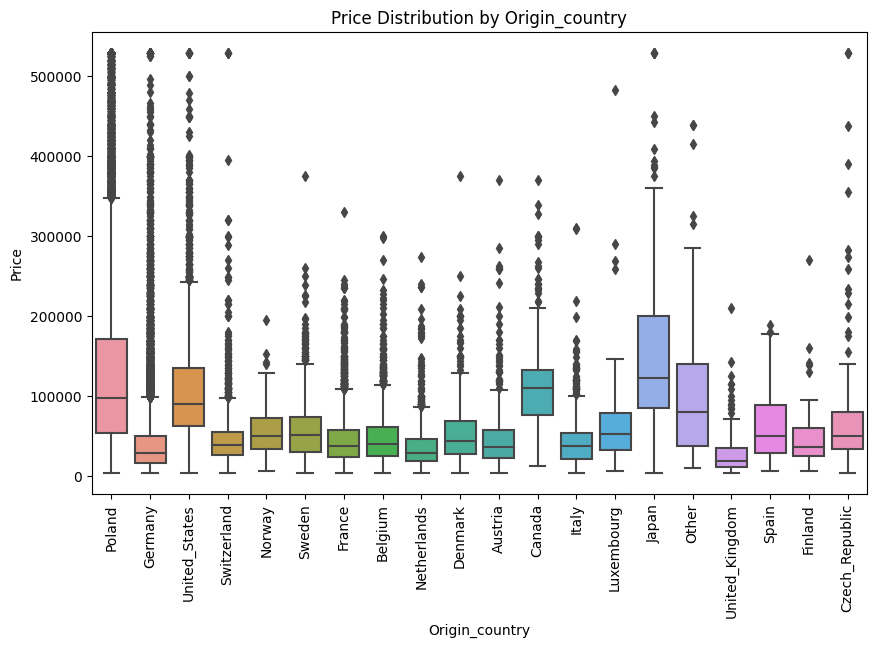

In [315]:
for i in ['year', 'fuel', 'drive', 'body', 'doors', 'seats', 'color', 'origin_country']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=i, y='price')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.title(f'Price Distribution by {i.capitalize()}')
    if i in ['year', 'color', 'origin_country']:
        plt.xticks(rotation=90)
    plt.show()

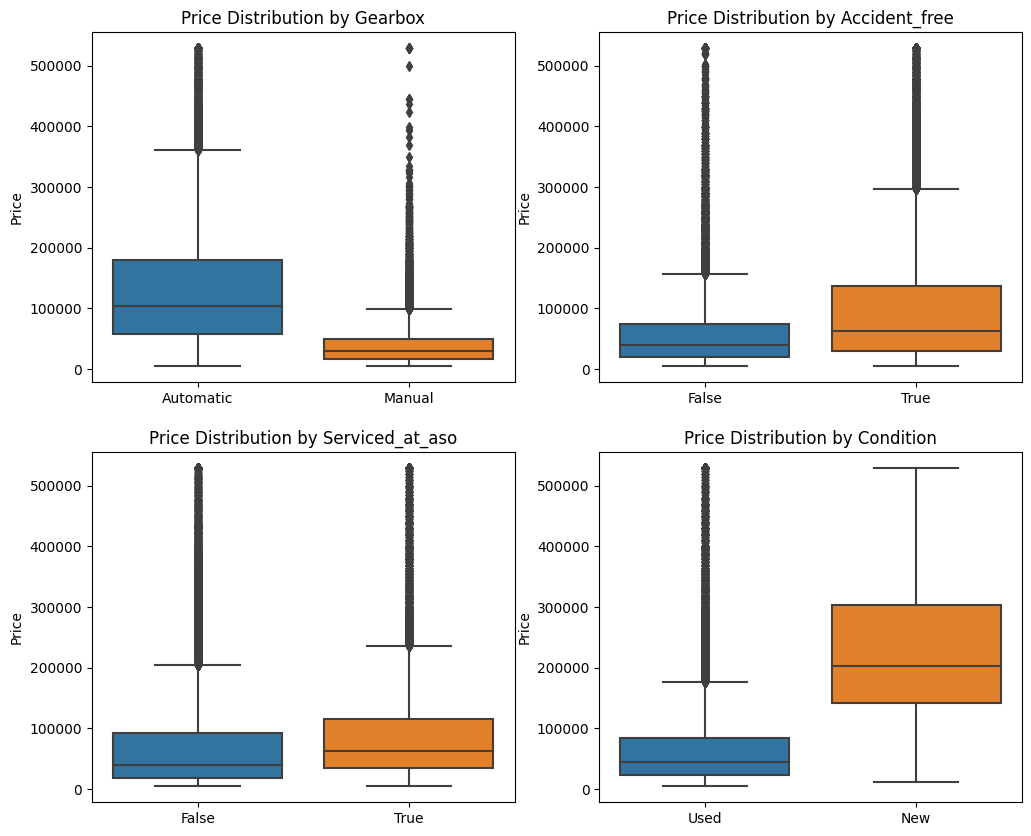

In [310]:
cats = ['gearbox', 'accident_free', 'serviced_at_ASO', 'condition']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, cat in enumerate(cats):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.boxplot(data=data, x=cat, y='price', ax=ax)
    ax.set_title(f'Price Distribution by {cat.capitalize()}')
    ax.set_xlabel('')
    ax.set_ylabel('Price')

plt.show()

In [311]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatic,4x4 (permanent),8.0,SUV,5.0,7.0,Gray,Poland,True,True,Used,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Gasoline,125.0,Manual,Front-wheel,NaN,Compact,5.0,5.0,Black,NaN,True,True,Used,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatic,4x4 (permanent),5.0,Estate,5.0,5.0,Gray,NaN,False,False,Used,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Gasoline,252.0,Automatic,4x4 (permanent),8.0,SUV,5.0,5.0,Gray,NaN,False,False,Used,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Gasoline,333.0,Automatic,4x4 (permanent),10.0,Compact,5.0,5.0,White,NaN,False,False,Used,75000.0
